# [Jupyter]BinaryClassification(TF).ipynb
Description   : Neural network for binary classification using tensorflow 2

## 이항 분류(Binary Classification)

In [1]:
import pandas as pd
import os

# 경로 초기화
os.chdir(r"C:\Users\TitusChoi\Desktop\Library\CodeLion\AI")

red = pd.read_csv('./datasets/winequality-red.csv', sep = ';')
white = pd.read_csv('./datasets/winequality-white.csv', sep = ';')

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
red['type'] = 0 # red 비율 0에 할당
white['type'] = 1 # white 비율 1에 할당

print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) # 두개의 데이터 셋을 합치는 concat 메서드
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

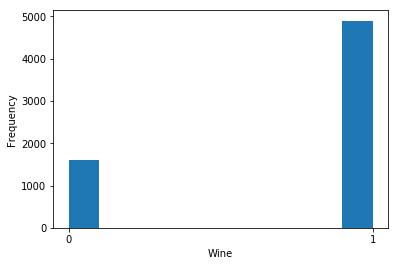

1    4898
0    1599
Name: type, dtype: int64


In [3]:
# 레드 와인과 화이트 와인 type histogram
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1]) # 눈금 표시
plt.xlabel('Wine')
plt.ylabel('Frequency')
plt.show()

print(wine['type'].value_counts()) # 실제 비율을 출력해주는 함수

데이터 정규화 공식은 아래와 같다.
$$x_{normalization} = {\frac{x - x_{min}}{x_{max} - x_{min}}}$$
이를 적용해서 데이터를 만들어주자.

In [4]:
# 데이터 정규화(Normalization)
wine_normal = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_normal.head())
print(wine_normal.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [5]:
# tensorflow를 활용하기 위해 numpy array 활용
import numpy as np
wine_shuffle = wine_normal.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3059       0.388430          0.073333     0.289157        0.007669   0.028239   
1174       0.314050          0.186667     0.186747        0.016871   0.116279   
1265       0.256198          0.153333     0.204819        0.104294   0.083056   
1394       0.148760          0.273333     0.078313        0.059816   0.049834   
3813       0.264463          0.146667     0.168675        0.024540   0.054817   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3059             0.076389              0.119816  0.091190  0.139535   
1174             0.086806              0.135945  0.193754  0.573643   
1265             0.121528              0.387097  0.177174  0.573643   
1394             0.055556              0.253456  0.069211  0.542636   
3813             0.069444              0.394009  0.087719  0.372093   

      sulphates   alcohol   quality  type  
3059   0.157303  0.362319  0.500000   1.0 

In [6]:
# 훈련 데이터와 테스트 데이터 분할
import tensorflow as tf

data_idx = int(len(wine_np)) # 총 데이터
train_idx = int(len(wine_np) * 0.8) # 80% 데이터 훈련
print('총 데이터 기준 index :', data_idx)
print('학습 데이터 기준 index :', train_idx)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

총 데이터 기준 index : 6497
학습 데이터 기준 index : 5197
[0.38842975 0.07333333 0.28915663 0.00766871 0.0282392  0.07638889
 0.11981567 0.09118951 0.13953488 0.15730337 0.36231884 0.5       ]
1.0
[0.44628099 0.32       0.10843373 0.01533742 0.11461794 0.03125
 0.03456221 0.16676306 0.33333333 0.15168539 0.27536232 0.33333333]
0.0


In [7]:
# tf용 원-핫 인코딩
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0. 1.]
[1. 0.]


이번에 최종 단에 활용할 활성화 함수는 softmax이며, 정의는 아래와 같다.
$$f(x) = {\frac{e^{x_i}}{\sum_{k=1}^N e^{x_k}}}$$

In [8]:
# tf 분류 구축, 마지막 레이어에 sofrmax activation function 활용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 48, activation='relu', input_shape = (12,)),
    tf.keras.layers.Dense(units = 24, activation='relu'),
    tf.keras.layers.Dense(units = 12, activation='relu'),
    tf.keras.layers.Dense(units = 2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 와인 분류
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 3s 17ms/step - loss: 0.2466 - accuracy: 0.8763 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9750 - val_loss: 0.0729 - val_accuracy: 0.9815
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9865 - val_loss: 0.0568 - val_accuracy: 0.9877
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9893 - val_loss: 0.0603 - val_accuracy: 0.9831
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.1066 - val_accuracy: 0.9762
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9928 - val_loss: 0.0482 - val_accuracy: 0.9877
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9915 - val_loss: 0.0518 - val_accuracy: 0.9892
Epoch

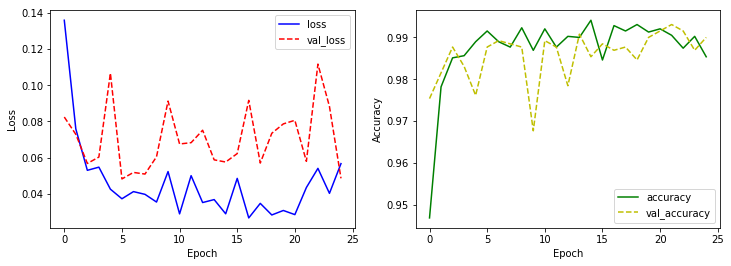

In [10]:
# 분류 모델 시각화
plt.figure(figsize=(12, 4)) # 시각화 크기 정의

plt.subplot(1, 2, 1) # 시각화 구역 1번에 할당
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # 시각화 구역 1번에 할당
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'y--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# 따로 분류해둔 테스트 값에 모델 평가 시작
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9946


[0.028227802366018295, 0.994615375995636]